Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)
First 5 rows of X:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
First 5 targets:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420

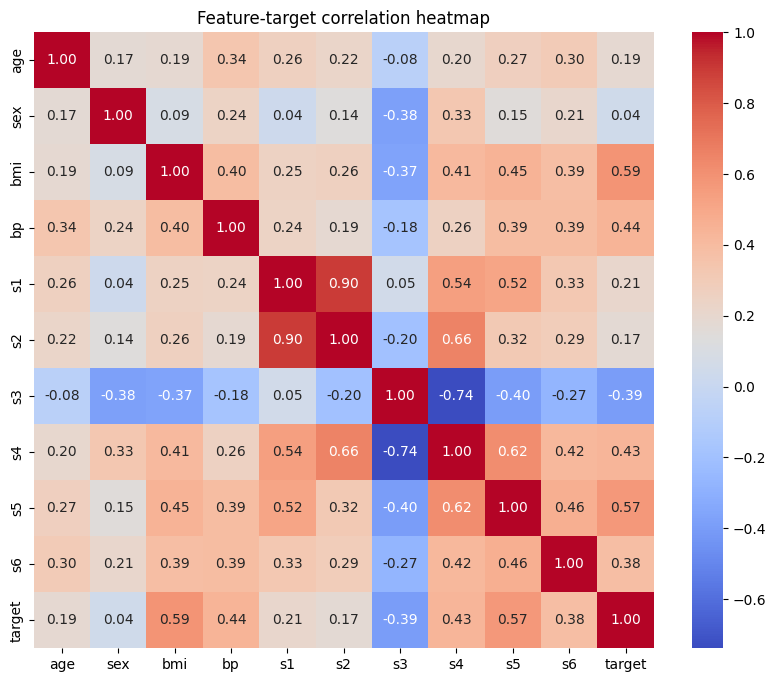

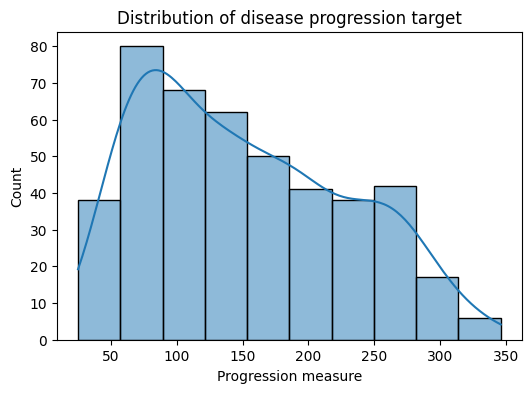

Linear Regression Results
  RMSE: 53.85344583676592
  R²: 0.4526027629719197
Best Ridge alpha: {'alpha': 10.0}
Ridge RMSE: 53.626287568895194
Ridge R²: 0.45721095677808476
Best Lasso alpha: {'alpha': 1.0}
Lasso RMSE: 53.14666587896139
Lasso R²: 0.46687670944102466
10-fold CV R² (LinearRegression): [0.5561455  0.23055827 0.35357673 0.62190752 0.2658727  0.61819798
 0.41815142 0.43513747 0.43436229 0.68569253]
Mean CV R²: 0.4619602420450602
Feature importances (by magnitude) for Linear Regression:
  feature  coefficient
4      s1   -44.448856
8      s5    35.161195
2     bmi    25.607121
5      s2    24.640954
3      bp    16.828872
7      s4    13.138784
1     sex   -11.511809
6      s3     7.676978
9      s6     2.351364
0     age     1.753758
Model saved to diabetes_lr_model.pkl


In [1]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
diabetes = load_diabetes(return_X_y=False, as_frame=True)  # as_frame=True gives pandas DataFrame
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

print("Feature names:", feature_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 targets:")
print(y.head())

# Step 3: Create a full DataFrame for exploration
df = X.copy()
df['target'] = y

# Quick descriptive stats
print(df.describe())

# Step 4: Exploratory Data Analysis (EDA)
# For example: correlations
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature-target correlation heatmap")
plt.show()

# Maybe plot distribution of target
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of disease progression target")
plt.xlabel("Progression measure")
plt.show()

# Step 5: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Scaling (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit a simple model (Linear Regression)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Linear Regression Results")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("  R²:", r2_score(y_test, y_pred))

# Step 8: Fit regularised models and tune hyperparameters
# Ridge
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
y_ridge_pred = ridge_grid.predict(X_test_scaled)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("Ridge R²:", r2_score(y_test, y_ridge_pred))

# Lasso
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_)
y_lasso_pred = lasso_grid.predict(X_test_scaled)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("Lasso R²:", r2_score(y_test, y_lasso_pred))

# Step 9: Cross-validation for baseline
cv_scores = cross_val_score(lr, scaler.transform(X), y, cv=10, scoring='r2')
print("10-fold CV R² (LinearRegression):", cv_scores)
print("Mean CV R²:", cv_scores.mean())

# Step 10: Interpret & summarise results
coeff_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)
print("Feature importances (by magnitude) for Linear Regression:")
print(coeff_df)

# Step 11: Wrap up: you can save the model, deploy, build UI etc.
# For example, you can use joblib to save:
import joblib
joblib.dump(lr, 'diabetes_lr_model.pkl')
print("Model saved to diabetes_lr_model.pkl")